# Intialize

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy_sz import Class as Class_sz

In [2]:
cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

# Notations

In `class_sz`, we use $\mathrm{Mpc}/h$ units.

Let us denote the angular diameter distance $D_A$.

Then, the comoving (or coordinate) distance $\chi$ is given by:

$$\chi = D_A(1+z)$$ 

Note that in the flat case, this is also the conformal distance. 


## Definition
The comoving distance is the distance traveled by light starting its journey from redshift $z$. We have 

$$\chi(z) = \int_0^z \frac{d z^\prime}{H(z^\prime)}.$$

For further details, we refer to Chapter 2 of [Dodelson \& Schmidt (2021)](https://www.sciencedirect.com/book/9780128159484/modern-cosmology). 


## Comvong volume

An important quantity for LSS calculations is the comvong volume,

$$ \frac{dV}{dz} = \frac{c\chi^2}{H}.$$

# Calculation

In [3]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_chi':0,
})

CPU times: user 532 μs, sys: 1.84 ms, total: 2.37 ms
Wall time: 2.71 ms


True

In [4]:
%%time
classy_sz.compute_class_szfast()

CPU times: user 198 ms, sys: 77.3 ms, total: 275 ms
Wall time: 54.7 ms


In [5]:
z = 1.
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

1697.9299202204513

Update cosmological parameters and recompute

In [6]:
cosmo_params.update({'omega_cdm':  0.11833})
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

1700.0951046348046

Time calculation after initialization

In [7]:
# 50 loops 10 runs
%timeit -n 50 -r 10 classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

20.9 ms ± 4.76 ms per loop (mean ± std. dev. of 10 runs, 50 loops each)


# Plot distance

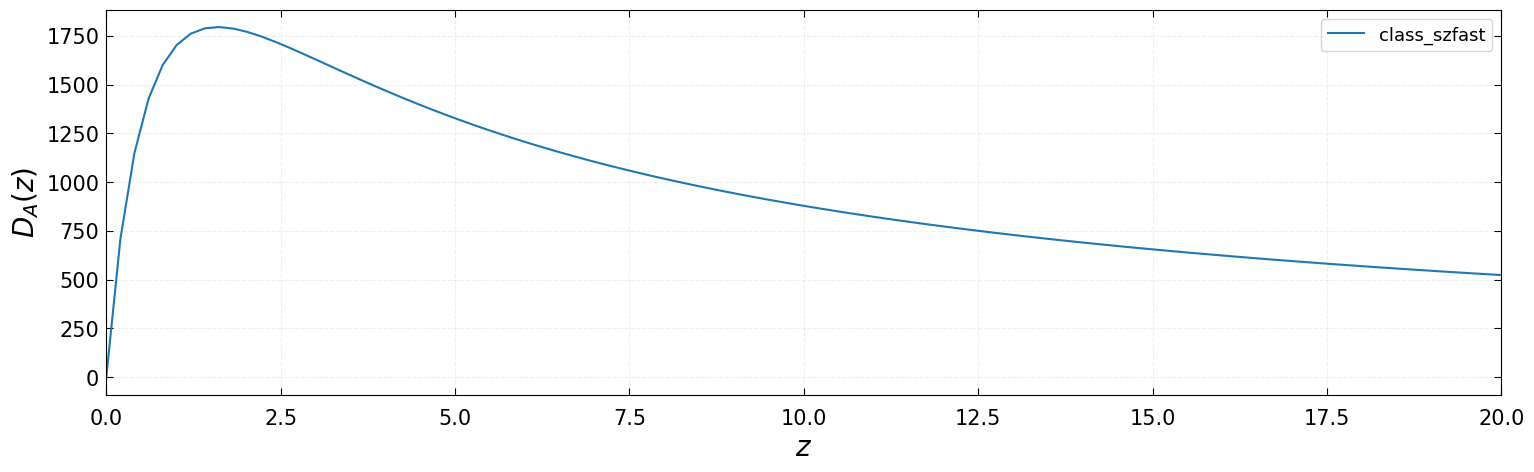

In [8]:
label_size = 15
title_size = 20
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(18,5))

ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')


z = np.linspace(0.,20,100)

ax.plot(z,classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params),ls='-',label='class_szfast')






ax.set_ylabel(r"$D_A(z)$",size=title_size)
ax.set_xlabel(r"$z$",size=title_size)
ax.set_xscale('linear')
ax.set_xlim(0,20)
ax.legend(fontsize=legend_size)



# Time computations of $D_A(z)$

Initialization

In [9]:
%timeit -n 50 -r 10 classy_sz.compute_class_szfast()

35 ms ± 5.7 ms per loop (mean ± std. dev. of 10 runs, 50 loops each)


In [10]:
z = np.linspace(0.,20,1000)
%timeit -n 50  -r 10 classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

17 ms ± 4.6 ms per loop (mean ± std. dev. of 10 runs, 50 loops each)


# Compute with Jax

In [11]:
from classy_sz import Class as Class_sz
import jax.numpy as jnp

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

In [12]:
%%time 
classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'jax' : 1,
})

CPU times: user 199 μs, sys: 278 μs, total: 477 μs
Wall time: 709 μs


True

In [13]:
%%time
classy_sz.compute_class_szfast()

CPU times: user 498 ms, sys: 70.2 ms, total: 569 ms
Wall time: 592 ms


In [14]:
z = 1.
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

Array(1697.92992022, dtype=float64)

In [15]:
cosmo_params.update({'omega_cdm':  0.11833})
classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

Array(1700.09510463, dtype=float64)

In [16]:
z = jnp.linspace(1.,20,1000)
"%.25f"%classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)[0]

'1700.0951046348045565537177026'

In [17]:
cosmo_params.update({'omega_cdm':  0.11933})
z = jnp.linspace(1.,20,1000)
"%.25f"%classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)[0]

'1697.9299202204513221658999100'

## Compatibility

In [18]:

import jax

z = jnp.linspace(1., 20, 1000)
daz_values = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)

# Check if it's a JAX array
is_jax_array = isinstance(daz_values, jnp.ndarray)

# Additional check: apply a JAX function to see if it supports JAX transformations
try:
    jitted_hubble = jax.jit(classy_sz.get_angular_distance_at_z)(z,params_values_dict = cosmo_params)
    supports_jit = True
except Exception as e:
    supports_jit = False
    print("Error with jax.jit:", e)

print("Is D_A(z) a JAX array?", is_jax_array)
print("Does D_A(z) support JAX jit?", supports_jit)


Is D_A(z) a JAX array? True
Does D_A(z) support JAX jit? True


In [19]:
daz_values = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
is_jax_array = isinstance(daz_values, jnp.ndarray)
print("Is get_hubble_at_z a JAX array?", is_jax_array)

Is get_hubble_at_z a JAX array? True


## Gradients

### 1 dimension

At one redshift

In [20]:
z = 1.
def DA(H0):
    cosmo_params.update({'H0':H0})
    daz = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return daz

In [21]:
DA(72)

Array(1630.88521896, dtype=float64)

In [22]:
from jax import grad
# Get the derivative of f with respect to p
dDA = grad(DA)

In [23]:
dDA(76.)

Array(-14.00494222, dtype=float64, weak_type=True)

In [24]:
import numpy as np
h = np.geomspace(1e-10, 1e-1,50)
dfunc = [(DA(76.+hp)-DA(76))/hp for hp in h]
jaxdDA = dDA(76.)

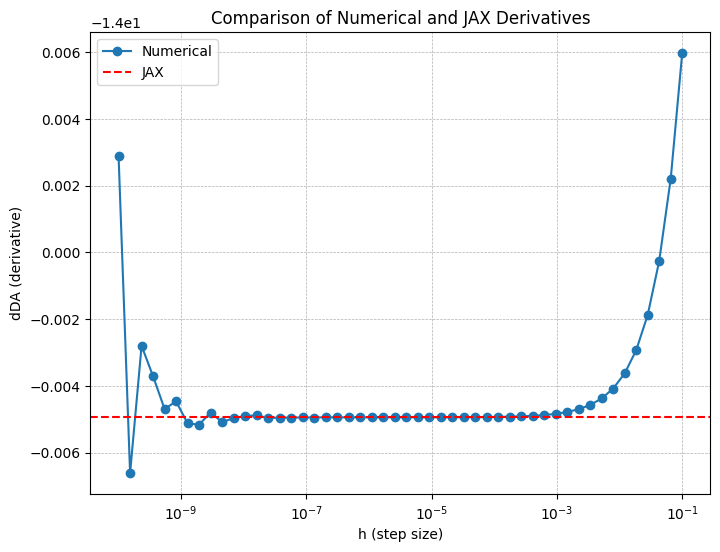

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(h, dfunc, label='Numerical', linestyle='-', marker='o')  # Line plot for 'numerical'
plt.axhline(y=jaxdDA, label='JAX', color='r', linestyle='--')   # Horizontal line for 'jax'

# Logarithmic scale for x-axis
plt.xscale('log')

# Axis labels and title
plt.xlabel('h (step size)')
plt.ylabel('dDA (derivative)')
plt.title('Comparison of Numerical and JAX Derivatives')

# Thin grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Legend
plt.legend()

# Display plot
plt.show()


On a redshift grid

In [26]:
from jax import jacrev, jacfwd
z = jnp.linspace(1., 20, 10)

def DA(H0):
    cosmo_params.update({'H0':H0})
    daz = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return daz

In [27]:
dDA = jacrev(DA)

In [28]:
%timeit -n 100 dDA(72.)

28.4 ms ± 2.99 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [29]:
dDA = jacfwd(DA)

In [30]:
%timeit -n 100 dDA(72.)

21.4 ms ± 4.78 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Forward mode is faster. 

### > 1 dimension

At one redshift

In [31]:
z = 1.
def DA(H0,omega_cdm):
    cosmo_params.update({'H0':H0,
                         'omega_cdm':omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return result

In [32]:
DA(72,0.11833)

Array(1632.84310812, dtype=float64)

In [33]:
from jax import jacfwd
# Get the derivative of f with respect to p
dHubble = jacfwd(DA,argnums=(0,1))

In [34]:
dHubble(76.,0.11933)

(Array(-14.00494222, dtype=float64), Array(-1783.43448132, dtype=float64))

On a redshift grid

In [35]:
z = jnp.linspace(1., 20, 10)

def DA(H0,omega_cdm):
    cosmo_params.update({'H0':H0,
                         'omega_cdm':omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return result

In [36]:
DA(72,0.11833)

Array([1632.84310812, 1571.11877833, 1271.8676124 , 1053.46629496,
        896.83513331,  780.53912212,  691.07787402,  620.22074422,
        562.72907243,  515.15300307], dtype=float64)

In [37]:
dDA = jacfwd(DA,argnums=(0,1))

In [38]:
dDA(76.,0.11933)

(Array([-14.00494222,  -8.6050116 ,  -5.78514655,  -4.33597964,
         -3.4625816 ,  -2.8826046 ,  -2.46779339,  -2.15711573,
         -1.91565929,  -1.72323142], dtype=float64),
 Array([-1783.43448132, -3081.2518757 , -2823.75760283, -2467.51538028,
        -2163.88758335, -1920.71914021, -1723.76087679, -1562.73780216,
        -1429.03369932, -1316.76429582], dtype=float64))

## Gradient surface

Sample code

In [39]:
prior_H0 = (40,100)
prior_omega_cdm = (0.08,0.2)


z = 1
def DA(H0,omega_cdm):
    cosmo_params.update({'H0':H0,
                         'omega_cdm':omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z,params_values_dict = cosmo_params)
    return result

dDA = jacfwd(DA,argnums=(0,1))

# one value: 

dDA(76.,0.11933)

(Array(-14.00494222, dtype=float64), Array(-1783.43448132, dtype=float64))

Full grid

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from jax import jacfwd
import classy_sz  # Assuming classy_sz is properly imported and available

cosmo_params = {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, # use H0 because this is what is used by the emulators and to avoid any ambiguity when comparing with camb. 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665   
}

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set({
'output':' ',
'skip_hubble':0,
'jax' : 1,
})

classy_sz.compute_class_szfast()

# Set up prior ranges
prior_H0 = (40, 100)
prior_omega_cdm = (0.08, 0.2)

# Create meshgrid for H0 and omega_cdm
H0_vals = np.linspace(prior_H0[0], prior_H0[1], 100)
omega_cdm_vals = np.linspace(prior_omega_cdm[0], prior_omega_cdm[1], 100)
H0_grid, omega_cdm_grid = np.meshgrid(H0_vals, omega_cdm_vals)

# Define cosmology parameters and set redshift
z = 1

# Define function to get DA
def DA(H0, omega_cdm):
    cosmo_params.update({'H0': H0, 'omega_cdm': omega_cdm})
    result = classy_sz.get_angular_distance_at_z(z, params_values_dict=cosmo_params)
    return result

# Calculate derivatives with respect to H0 and omega_cdm
dDA = jacfwd(DA, argnums=(0, 1))

# Initialize arrays to store derivative values
dDA_dH0_values = np.zeros_like(H0_grid)
dDA_domega_cdm_values = np.zeros_like(omega_cdm_grid)


In [41]:
%%time
# Evaluate derivatives over the grid
for i in range(H0_grid.shape[0]):
    for j in range(H0_grid.shape[1]):
        dH0, domega_cdm = dDA(H0_grid[i, j], omega_cdm_grid[i, j])
        dDA_dH0_values[i, j] = dH0
        dDA_domega_cdm_values[i, j] = domega_cdm

CPU times: user 5min 45s, sys: 44.2 s, total: 6min 30s
Wall time: 3min 44s


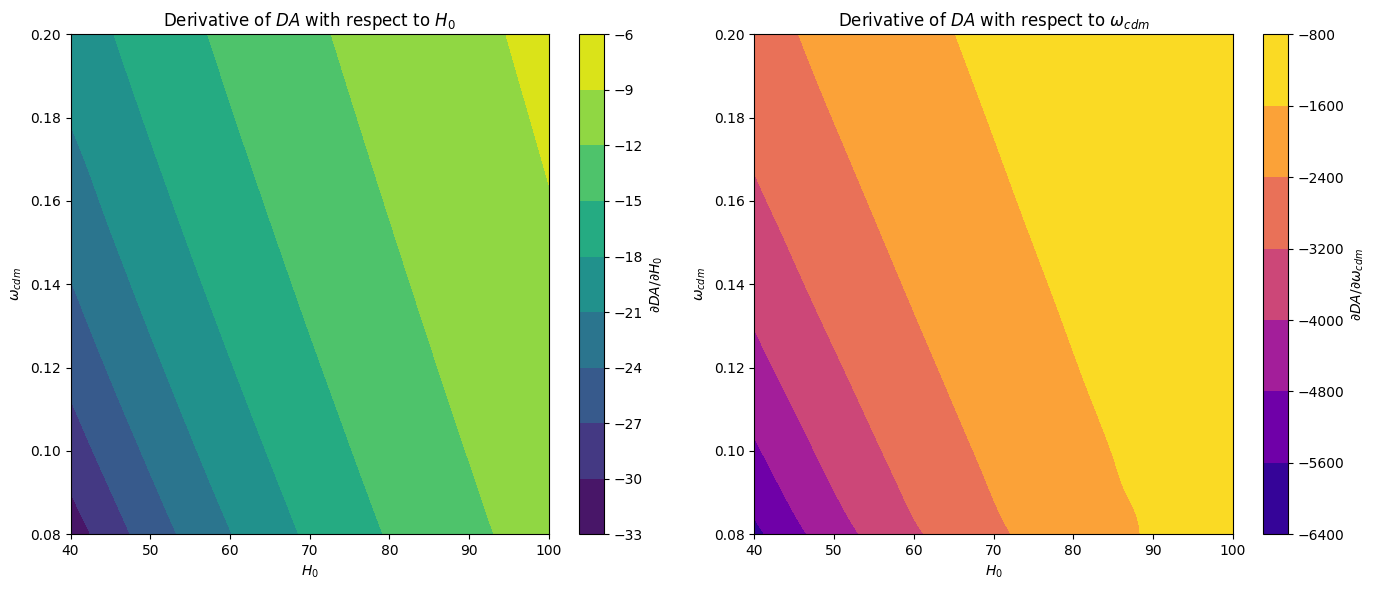

In [42]:
# Plotting
plt.figure(figsize=(14, 6))

# First plot: Derivative with respect to H0
plt.subplot(1, 2, 1)
plt.contourf(H0_grid, omega_cdm_grid, dDA_dH0_values, cmap='viridis')
plt.colorbar(label=r'$\partial DA / \partial H_0$')
plt.xlabel(r'$H_0$')
plt.ylabel(r'$\omega_{cdm}$')
plt.title(r'Derivative of $DA$ with respect to $H_0$')

# Second plot: Derivative with respect to omega_cdm
plt.subplot(1, 2, 2)
plt.contourf(H0_grid, omega_cdm_grid, dDA_domega_cdm_values, cmap='plasma')
plt.colorbar(label=r'$\partial DA / \partial \omega_{cdm}$')
plt.xlabel(r'$H_0$')
plt.ylabel(r'$\omega_{cdm}$')
plt.title(r'Derivative of $DA$ with respect to $\omega_{cdm}$')

plt.tight_layout()
plt.show()